In [1]:
import torch.nn as nn
import torch.optim as optim
import torch
import utils
import train
import numpy as np
import time
import exp_utils

device = torch.device("cuda:4")

net = utils.get_model(56, 10, device)

Create ResNet-56 for 


In [2]:
net.num_parameters, net.num_adaptable_params

(853018, 851904)

## Get MAC operations for a network

In [3]:
small_net = utils.get_model(8, 100, device)
exp_utils.get_macs(small_net, (3,32,32))

Create ResNet-8 for 
Model has 1.249520e+07 MAC


12495204.0

In [4]:
small_net.active_blocks

3

In [5]:
utils.get_model_size(small_net)

0.31140899658203125

## Get Mac Operations for Different Model Fractions

In [6]:
block_inputs = 10*[(16,32,32)] + 9*[(32,16,16)] + 8*[(64,8,8)]
model_input = (3,32,32)
block_macs, fractional_macs = exp_utils.get_fractional_macs(net, model_input, block_inputs)

The model has 853018 parameters and full model is 127111818.0 Mac
Layer 0 block 0 has 4672 params and 4816896.0 Mac
Layer 0 block 1 has 4672 params and 4816896.0 Mac
Layer 0 block 2 has 4672 params and 4816896.0 Mac
Layer 0 block 3 has 4672 params and 4816896.0 Mac
Layer 0 block 4 has 4672 params and 4816896.0 Mac
Layer 0 block 5 has 4672 params and 4816896.0 Mac
Layer 0 block 6 has 4672 params and 4816896.0 Mac
Layer 0 block 7 has 4672 params and 4816896.0 Mac
Layer 0 block 8 has 4672 params and 4816896.0 Mac
Layer 1 block 0 has 13952 params and 3604480.0 Mac
Layer 1 block 1 has 18560 params and 4767744.0 Mac
Layer 1 block 2 has 18560 params and 4767744.0 Mac
Layer 1 block 3 has 18560 params and 4767744.0 Mac
Layer 1 block 4 has 18560 params and 4767744.0 Mac
Layer 1 block 5 has 18560 params and 4767744.0 Mac
Layer 1 block 6 has 18560 params and 4767744.0 Mac
Layer 1 block 7 has 18560 params and 4767744.0 Mac
Layer 1 block 8 has 18560 params and 4767744.0 Mac
Layer 2 block 0 has 55552

In [7]:
model_fractions = utils.get_model_fractions(net)
for fr in model_fractions:
    print(f'{fr:.3f}', end = ' ')

0.001 0.007 0.012 0.018 0.023 0.029 0.034 0.040 0.045 0.051 0.067 0.089 0.110 0.132 0.154 0.176 0.198 0.219 0.241 0.306 0.393 0.480 0.566 0.653 0.740 0.827 0.913 1.000 

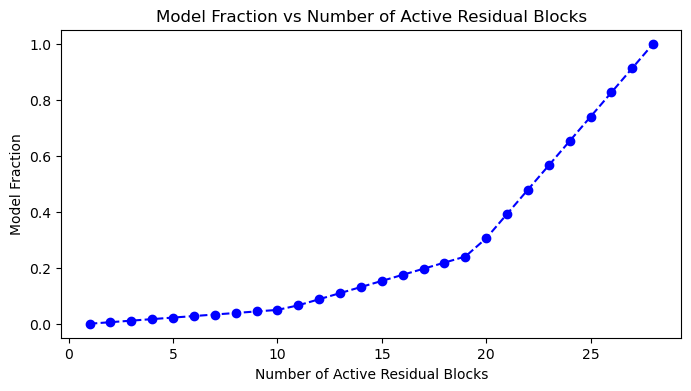

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(np.arange(1,len(model_fractions)+1), model_fractions, '--bo')
plt.ylabel('Model Fraction')
plt.xlabel('Number of Active Residual Blocks')
plt.title("Model Fraction vs Number of Active Residual Blocks")

plt.show()

In [9]:
fractional_macs

[496266.0,
 5313162.0,
 10130058.0,
 14946954.0,
 19763850.0,
 24580746.0,
 29397642.0,
 34214538.0,
 39031434.0,
 43848330.0,
 47452810.0,
 52220554.0,
 56988298.0,
 61756042.0,
 66523786.0,
 71291530.0,
 76059274.0,
 80827018.0,
 85594762.0,
 89166474.0,
 93909642.0,
 98652810.0,
 103395978.0,
 108139146.0,
 112882314.0,
 117625482.0,
 122368650.0,
 127111818.0]

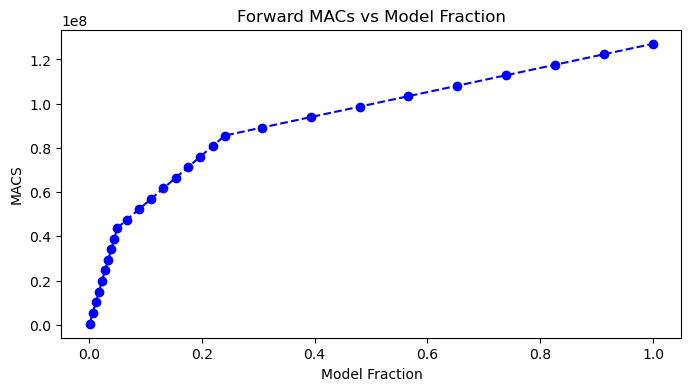

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(model_fractions, fractional_macs, '--bo')
plt.ylabel('MACS')
plt.xlabel('Model Fraction')
plt.title("Forward MACs vs Model Fraction")

plt.show()

## Get Forward Pass Times for Different Model Fractions

In [5]:
batch_size = 64
val_size = 50000-1280
train_size = 1280
trainloader, _, __ = utils.get_CIFAR10(batch_size, val_size, train_size)

In [6]:
forward_times = exp_utils.get_forward_times(net, trainloader, device)
forward_times

Model fraction : 0.0013059513398310468, forward time: 0.025052690505981447
Model fraction : 0.006782975271330734, forward time: 0.041699695587158206
Model fraction : 0.012259999202830421, forward time: 0.055014419555664065
Model fraction : 0.017737023134330107, forward time: 0.06849555969238282
Model fraction : 0.023214047065829795, forward time: 0.08231801986694336
Model fraction : 0.028691070997329482, forward time: 0.09583425521850586
Model fraction : 0.03416809492882917, forward time: 0.11023001670837403
Model fraction : 0.03964511886032886, forward time: 0.122576904296875
Model fraction : 0.045122142791828544, forward time: 0.12989940643310546
Model fraction : 0.05059916672332823, forward time: 0.13732213973999025
Model fraction : 0.06695521079273825, forward time: 0.14779286384582518
Model fraction : 0.08871325106855893, forward time: 0.16465649604797364
Model fraction : 0.11047129134437961, forward time: 0.16024703979492189
Model fraction : 0.13222933162020029, forward time: 0.1

[0.025052690505981447,
 0.041699695587158206,
 0.055014419555664065,
 0.06849555969238282,
 0.08231801986694336,
 0.09583425521850586,
 0.11023001670837403,
 0.122576904296875,
 0.12989940643310546,
 0.13732213973999025,
 0.14779286384582518,
 0.16465649604797364,
 0.16024703979492189,
 0.18008594512939452,
 0.1913374900817871,
 0.19218778610229492,
 0.19743404388427735,
 0.2034086227416992,
 0.21926503181457518,
 0.23662114143371582,
 0.2314979076385498,
 0.2520455837249756,
 0.2566336154937744,
 0.2646346569061279,
 0.27932162284851075,
 0.2842320442199707,
 0.30004048347473145,
 0.3030572414398193]

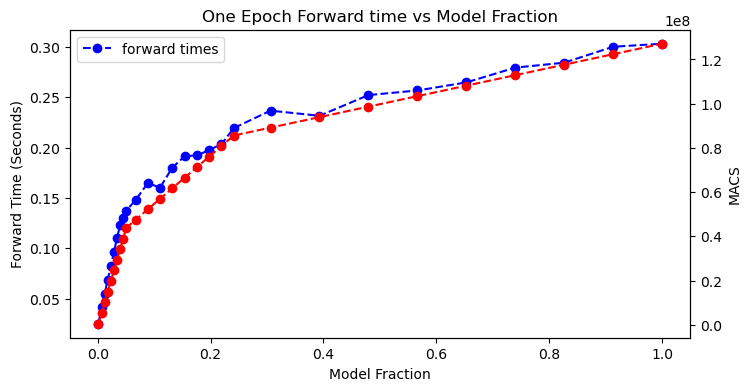

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(model_fractions, forward_times, '--bo', label = "Forward Time")
ax.set_ylabel('Forward Time (Seconds)')
ax.set_xlabel('Model Fraction')
ax.set_title("One Epoch Forward time vs Model Fraction")

ax2 = ax.twinx()

ax2.plot(model_fractions, fractional_macs, '--ro', label = "macs")
ax2.set_ylabel("MACS")

ax.legend()

## Get Train Epoch Times for Different Model Fractions

In [8]:
epoch_times = exp_utils.get_epoch_times(net, trainloader, device)
epoch_times

Model fraction : 0.0013059513398310468, epoch time: 0.23906636238098145
Model fraction : 0.006782975271330734, epoch time: 0.270994758605957
Model fraction : 0.012259999202830421, epoch time: 0.2929670810699463
Model fraction : 0.017737023134330107, epoch time: 0.30977559089660645
Model fraction : 0.023214047065829795, epoch time: 0.34007577896118163
Model fraction : 0.028691070997329482, epoch time: 0.380718469619751
Model fraction : 0.03416809492882917, epoch time: 0.4143225193023682
Model fraction : 0.03964511886032886, epoch time: 0.4257540702819824
Model fraction : 0.045122142791828544, epoch time: 0.46474308967590333
Model fraction : 0.05059916672332823, epoch time: 0.497649621963501
Model fraction : 0.06695521079273825, epoch time: 0.48212366104125975
Model fraction : 0.08871325106855893, epoch time: 0.5038867473602295
Model fraction : 0.11047129134437961, epoch time: 0.4980954170227051
Model fraction : 0.13222933162020029, epoch time: 0.5316036224365235
Model fraction : 0.15398

[0.23906636238098145,
 0.270994758605957,
 0.2929670810699463,
 0.30977559089660645,
 0.34007577896118163,
 0.380718469619751,
 0.4143225193023682,
 0.4257540702819824,
 0.46474308967590333,
 0.497649621963501,
 0.48212366104125975,
 0.5038867473602295,
 0.4980954170227051,
 0.5316036224365235,
 0.5205359935760498,
 0.5451046466827393,
 0.5684465885162353,
 0.5607204914093018,
 0.6046463489532471,
 0.6061876296997071,
 0.6558106899261474,
 0.6428714275360108,
 0.6585829257965088,
 0.6867555618286133,
 0.6866205215454102,
 0.7309763431549072,
 0.7122433185577393,
 0.7276234149932861]

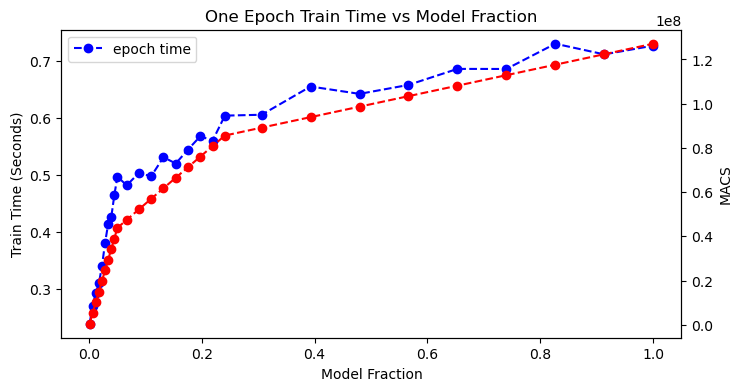

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(model_fractions, epoch_times, '--bo', label = "epoch time")
ax.set_ylabel('Train Time (Seconds)')
ax.set_xlabel('Model Fraction')
ax.set_title("One Epoch Train Time vs Model Fraction")

ax2 = ax.twinx()

ax2.plot(model_fractions, fractional_macs, '--ro', label = "macs")


ax2.set_ylabel("MACS")

ax.legend()